<a href="https://colab.research.google.com/github/MahmoudMostafa01/SQL-injection-detection-Ai-model/blob/main/SQL%20injection%20detection%20Ai%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import necessary libraries**


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#**Load the drive that includes the dataset**

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load the dataset using Pandas**

In [54]:
data = pd.read_csv('/content/drive/MyDrive/Cyshield Task/sqliv2.csv',encoding='utf-16')

# **EDA for the dataset**

In [55]:
data.shape

(33761, 2)

In [56]:
data.dtypes

,0
Sentence,object
Label,int64


In [57]:
data.head()

,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1


In [58]:
data.tail()

,Sentence,Label
33756,syrett,0
33757,arrechea bellveh,0
33758,1664,0
33759,almaluez,0
33760,f6lo40r06,0


In [59]:
data.isna().sum()

,0
Sentence,4
Label,0


In [60]:
data[data['Sentence'].isna()]

,Sentence,Label
0,NaN,1
951,NaN,0
3953,NaN,1
3995,NaN,1


In [61]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33757 entries, 0 to 33756
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  33757 non-null  object
 1   Label     33757 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 527.6+ KB


In [63]:
data.duplicated().sum()

30

In [64]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [65]:
data.duplicated().sum()

0

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33727 entries, 0 to 33726
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  33727 non-null  object
 1   Label     33727 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 527.1+ KB


#**Check the classes distribution**

In [67]:
class_distribution=pd.DataFrame(data['Label'].value_counts())
class_distribution

,count
Label,
0,22303
1,11424


#Bar plot that shows the classes distribution

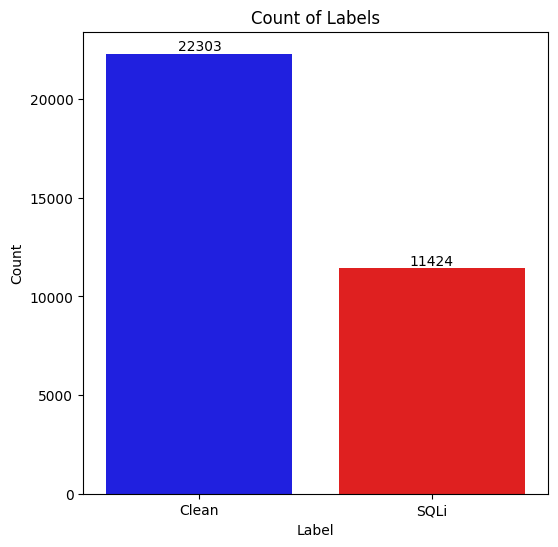

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Customized bar plot
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Label', y='count', data=class_distribution, palette=['blue', 'red'])

# Rename the x-axis labels
plt.xticks(ticks=[0, 1], labels=['Clean', 'SQLi'])

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Label')
plt.title('Count of Labels')
plt.ylabel('Count')
plt.show()

#Plot to check if the data is labels is ordered

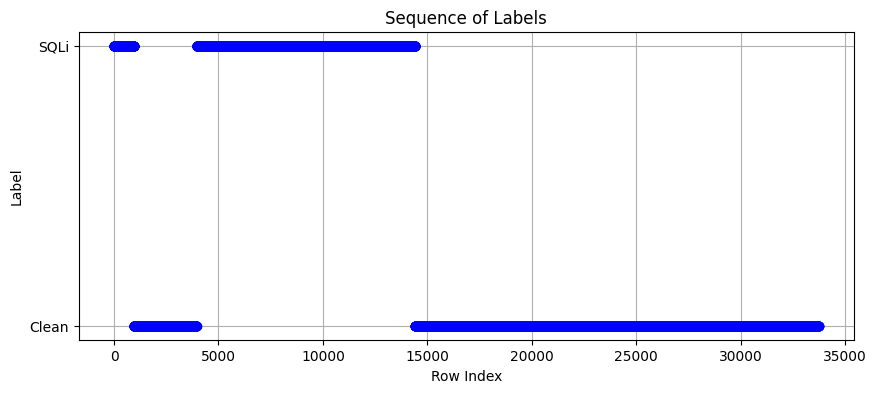

In [69]:
import matplotlib.pyplot as plt

# Plot the labels
plt.figure(figsize=(10, 4))
plt.plot(data['Label'], marker='o', linestyle='', color='b')
plt.title('Sequence of Labels')
plt.xlabel('Row Index')
plt.ylabel('Label')
plt.yticks([0, 1], ["Clean", "SQLi"])
plt.grid(True)
plt.show()

#**Data Augmentation**

Add another dataset to achieve balance

In [70]:
df=pd.read_csv('/content/drive/MyDrive/Cyshield Task/payload_full.csv')

In [71]:
df.shape

(31067, 4)

In [72]:
df.head()

,payload,length,attack_type,label
0,c/ caridad s/n,14,norm,norm
1,"campello, el",12,norm,norm
2,40184,5,norm,norm
3,1442431887503330,16,norm,norm
4,nue37,5,norm,norm


In [73]:
del[df['length']]
del[df['label']]

In [74]:
df.columns=['Sentence','Label']

In [75]:
df=df[df['Label']=='sqli']

In [76]:
df.isna().sum()

,0
Sentence,0
Label,0


In [77]:
df.duplicated().sum()

0

Change the label from SQLi to 1, to match the first dataset structure

In [78]:
df['Label']=1

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10852 entries, 436 to 30545
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  10852 non-null  object
 1   Label     10852 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 254.3+ KB


#concatenate the 2 datasets

In [80]:
data=pd.concat([data,df])
data.reset_index(drop=True, inplace=True)

In [81]:
data.shape

(44579, 2)

In [82]:
after_redistribution=pd.DataFrame(data['Label'].value_counts())
after_redistribution

,count
Label,
0,22303
1,22276


In [83]:
data.duplicated().sum()

392

In [84]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

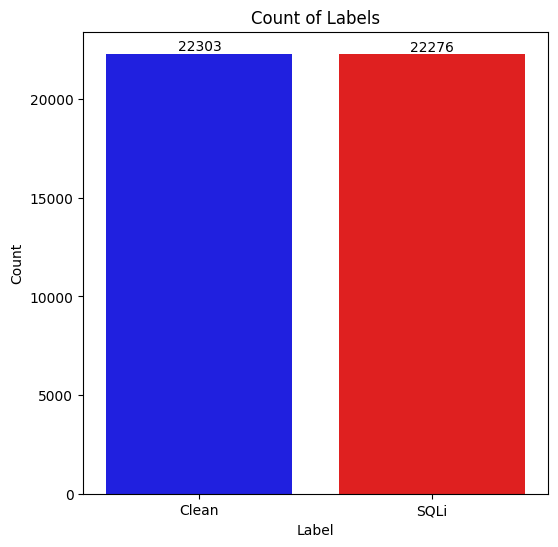

In [85]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Customized bar plot
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Label', y='count', data=after_redistribution, palette=['blue', 'red'])

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.xticks(ticks=[0, 1], labels=['Clean', 'SQLi'])
plt.title('Count of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

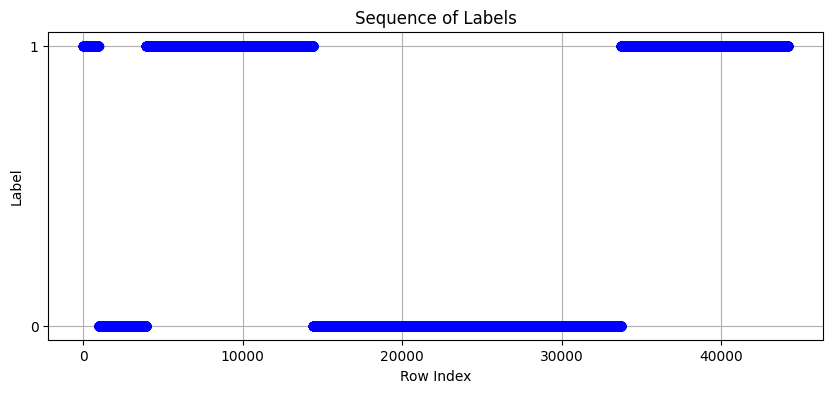

In [86]:
# Plot the labels
plt.figure(figsize=(10, 4))
plt.plot(data['Label'], marker='o', linestyle='', color='b')
plt.title('Sequence of Labels')
plt.xlabel('Row Index')
plt.ylabel('Label')
plt.yticks([0, 1])
plt.grid(True)
plt.show()

In [87]:
data.shape

(44187, 2)

In [88]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

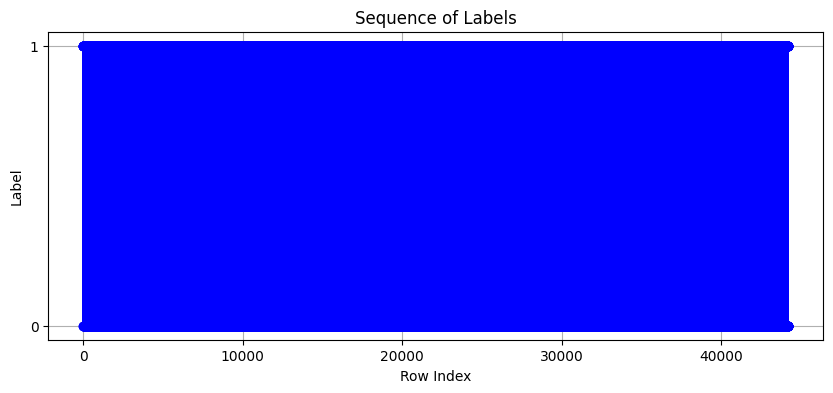

In [89]:
# Plot the labels
plt.figure(figsize=(10, 4))
plt.plot(data['Label'], marker='o', linestyle='-', color='b')
plt.title('Sequence of Labels')
plt.xlabel('Row Index')
plt.ylabel('Label')
plt.yticks([0, 1])
plt.grid(True)
plt.show()

# UnderSampling trial

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# # Undersample majority class
# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X, y)

# # Combine back into a DataFrame (optional)
# balanced_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Label'])], axis=1)
# X_resampled=balanced_data['Sentence']
# y_resampled=balanced_data['Label']
# # Check class distribution
# print(balanced_data['Label'].value_counts())


# OverSampling trial

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# #Split features and labels
# X = data.drop('Label', axis=1)
# y = data['Label']

# # Oversample minority class
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X, y)

# # Combine back into a DataFrame (optional)
# balanced_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Label'])], axis=1)
# X_resampled=balanced_data['Sentence']
# y_resampled=balanced_data['Label']
# # Check class distribution
# print(balanced_data['Label'].value_counts())


# SMOTE Trial

In [ ]:
##Smote
# from sklearn.feature_extraction.text import TfidfVectorizer
# from imblearn.over_sampling import SMOTE

# # Vectorize the text data
# vectorizer = TfidfVectorizer()
# X_vectorized = vectorizer.fit_transform(data['Sentence'])

# # Apply SMOTE on the vectorized data
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_vectorized, data['Label'])


# # Convert resampled data to dense format (optional)
# X_resampled_dense = X_resampled.toarray()
# y_resampled = pd.DataFrame(y_resampled, columns=['Label'])

# # Combine if needed
# balanced_data = pd.concat([pd.DataFrame(X_resampled_dense), y_resampled], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


# **Train test split**

In [90]:
# Split the dataset into training and testing sets
X=data['Sentence']
y=data['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# **Grid Search to find best vectorizer parameters**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True)),  # TfidfVectorizer
    ('clf', RandomForestClassifier(random_state=42))  # Random Forest
])

# Define the parameter grid
param_grid = {
    'tfidf__token_pattern': [
        r"(?u)\b\w+\b",  # Default: alphanumeric tokens
        r"(?u)\b\w+\b|[\"';=()#-]+|/\*|\*/|--" # Alphanumeric + special characters + SQL comments

    ]
}

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',  # Accuracy
    'recall': 'recall'       # Recall
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring=scoring,  # Use multiple scoring metrics
    refit='accuracy',  # Refit the best model on the full dataset using accuracy
    n_jobs=-1  # Use all available CPU cores
)

# Perform Grid Search
grid_search.fit(X, y)

# Print the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Recall & Accuracy:", grid_search.best_score_)

Best Parameters: {'tfidf__token_pattern': '(?u)\\b\\w+\\b|[\\"\';=()#-]+|/\\*|\\*/|--'}
Best Recall & Accuracy: 0.6611898997055187


# **TF-IDF Vectorizer**

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    analyzer='word',
    token_pattern=r'(?u)\b\w\w+\b|--|[\"\';#\-+()/\*\*/]',
    max_df=0.9,
    min_df=2,
    norm='l2',
    ngram_range=(1, 2)
)

# Fit and transform training data
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

# **Train RandomForestClassifier**

In [92]:
# Initialize and train the model
model = RandomForestClassifier(class_weight={0: 1, 1: 5},random_state=42,min_samples_split=5,min_samples_leaf=2,n_jobs=-1)
model.fit(X_train_vectorized, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 5}, min_samples_leaf=2,
                       min_samples_split=5, n_jobs=-1, random_state=42)

# **Random Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions for random search
param_dist = {
    'n_estimators': randint(100, 300),  # Random integer between 100 and 300
    'max_depth': [None, 10, 20],  # Fixed choices
    'min_samples_split': randint(2, 10),  # Random integer between 2 and 10
    'min_samples_leaf': randint(1, 4),  # Random integer between 1 and 4
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 5}, 'balanced']  # Fixed choices
}

# Initialize Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    scoring='recall',  # Use recall for evaluation
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Fit Randomized Search
random_search.fit(X_train_vectorized, y_train)

# Best parameters and recall score
print("Best Parameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)

Best Parameters: {'class_weight': {0: 1, 1: 5}, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 154}
Best Recall Score: 0.9972582362451391


# **Grid Search To find best class_weight**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for class weights
param_grid = {
    # 'n_estimators': [100, 200, 300],
    # 'max_depth': [None, 10, 20],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 5}, 'balanced']
}

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='recall',  # Use recall for evaluation
    n_jobs=-1
)

# Fit Grid Search
grid_search.fit(X_train_vectorized, y_train)

# Best parameters and recall score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'class_weight': {0: 1, 1: 5}}
Best Recall Score: 0.9964015013414622


# **Test on validation set**

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the training data into a smaller training set and a validation set
X_train_small, X_val, y_train_small, y_val = train_test_split(
    X_train_vectorized, y_train, test_size=0.2, random_state=42
)

# Measure training time
start_time = time.time()  # Start timer

# Train the model on the smaller training set
model.fit(X_train_small, y_train_small)

end_time = time.time()  # End timer
training_time = end_time - start_time  # Calculate training time

# Evaluate on the validation set
y_val_pred = model.predict(X_val)

# Output results
print(f"Training Time: {training_time:.2f} seconds")
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

Training Time: 5.02 seconds
Validation Accuracy: 0.9961810466760962
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3613
           1       0.99      1.00      1.00      3457

    accuracy                           1.00      7070
   macro avg       1.00      1.00      1.00      7070
weighted avg       1.00      1.00      1.00      7070



# **Explore important features**

In [93]:
features=pd.DataFrame(model.feature_importances_,index=tfidf_vectorizer.get_feature_names_out())
print(features.shape)
features.sort_values(by=0,ascending=False)

(5000, 1)


,0
),0.125677
where,0.061453
',0.054080
(,0.040612
--,0.037479
...,...
8755 8755,0.000000
8765,0.000000
8777,0.000000
8797,0.000000


# **Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X_train_vectorized, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.99575672 0.99490806 0.99462518 0.99420085 0.99660489]
Mean Cross-Validation Accuracy: 0.9952191401667501


# **Model evaluation**

Accuracy: 0.9967187146413216
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4461
           1       1.00      1.00      1.00      4377

    accuracy                           1.00      8838
   macro avg       1.00      1.00      1.00      8838
weighted avg       1.00      1.00      1.00      8838

Avg confidence level: 0.9841629510605479


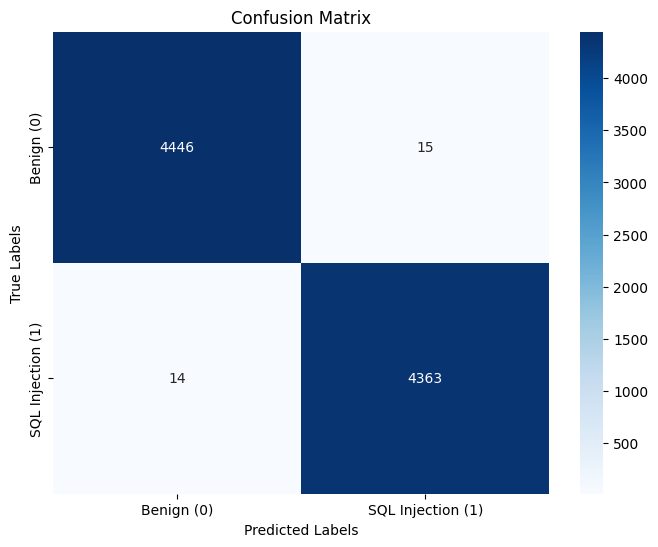

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test_vectorized)
propabilities=model.predict_proba(X_test_vectorized)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
#Avg Confidence level
avg_confidence = propabilities.max(axis=1).mean()  # Average of the highest probability for each prediction

print("Avg confidence level:",avg_confidence)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'SQL Injection (1)'],
            yticklabels=['Benign (0)', 'SQL Injection (1)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Misclassified samples**

In [ ]:
misclassified_indices = (y_pred != y_test)

# Extract misclassified samples
misclassified_samples = X_test[misclassified_indices]
misclassified_true_labels = y_test[misclassified_indices]
misclassified_predicted_labels = y_pred[misclassified_indices]
# Combine for analysis
df_misclassified = pd.DataFrame({
    'True Label': misclassified_true_labels,
    'Predicted Label': misclassified_predicted_labels,
    'Sample Data': misclassified_samples
})
# count of misclassified samples
print(df_misclassified.shape)

# Display the misclassified samples
df_misclassified[df_misclassified['Predicted Label']==0]

(29, 3)


,True Label,Predicted Label,Sample Data
31061,1,0,0x730065006c0065006300740020004000400076006500...
29891,1,0,UEs
9437,1,0,grant connect to name; grant resource to name;
24084,1,0,UEv
38888,1,0,*|
7573,1,0,.s
17782,1,0,",s"
39833,1,0,1
7403,1,0,%28
1147,1,0,delete


# **Save the model for future use**

In [ ]:
import joblib

# Save the model and vectorizer
joblib.dump(model, 'sql_injection_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['/content/drive/MyDrive/Cyshield Task/tfidf_vectorizer.pkl']